In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

input_image = tf.keras.layers.Input(shape=(784,))
encoded_input = tf.keras.layers.Dense(32, activation="relu")(input_image)
decoded_output = tf.keras.layers.Dense(784, activation="sigmoid")(encoded_input)
autoencoder = tf.keras.models.Model(input_image, decoded_output)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [16]:
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()

In [18]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [19]:
autoencoder.fit(
    X_train,
    X_train,
    epochs=30,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test)
)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3878 - val_loss: 0.1864
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1764 - val_loss: 0.1506
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1465 - val_loss: 0.1323
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1304 - val_loss: 0.1209
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1197 - val_loss: 0.1127
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1126 - val_loss: 0.1067
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1065 - val_loss: 0.1022
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1024 - val_loss: 0.0991
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0995 - val_loss: 0.0968
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0979 - val_loss: 0.0954
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0966 - val_loss: 0.0945
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step


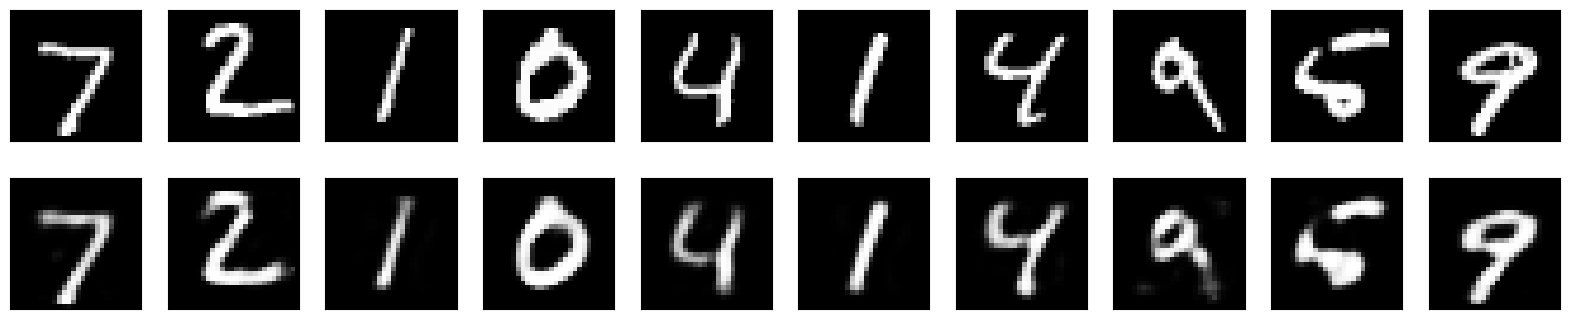

In [20]:
reconstructed_img = autoencoder.predict(X_test)
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(reconstructed_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()